In [ ]:
pip install seaborn matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_file_path = "../content/drive/MyDrive/Colab Notebooks/coll_lb_single_house.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

<ipython-input-4-a3f4304f10b9>:2: DtypeWarning: Columns (4,35,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_df = pd.read_csv(train_file_path)


Full train dataset shape is (274196, 132)


In [ ]:
dataset_df.head(3)

,CLP,YEAR,COLL_ID,DOCUMENT_TYPE_DESC,DOCUMENT_NO,BUILDING_STYLE_DESC,PROJECT_ID,PROJECT_NAME,PROVINCE_NAME,DISTICT_NAME,...,CONVENIENCE_STORE_3KM_SHORTEST,DISCOUNT_STORE_3KM_SHORTEST,DEPARTMENT_STORE_3KM_SHORTEST,GAS_STATION_3KM_SHORTEST,MASS_TRANSIT_3KM_SHORTEST,EDUCATION_3KM_SHORTEST,BANK_3KM_SHORTEST,COFFEE_SHOP_3KM_SHORTEST,PHARMACY_3KM_SHORTEST,GOVERNMENT_OFFICE_3KM_SHORTEST
0,2482000,2020,1406643,โฉนด(Deed),183675,บ้านเดี่ยว,NaN,NaN,ระยอง,เมืองระยอง,...,1.373,1.996,0.0,1.301,0.0,1.666,2.810,1.314,0.0,0.967
1,4104400,2020,1404302,โฉนด(Deed),71425,บ้านเดี่ยว,NaN,NaN,นครปฐม,นครชัยศรี,...,2.733,2.845,0.0,2.588,0.0,1.838,2.758,2.713,0.0,1.505
2,1598000,2007,751626,โฉนด(Deed),91048,บ้านเดี่ยว,NaN,NaN,นครราชสีมา,เมืองนครราชสีมา,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning
1. Drop unnecessary data column
2. Removing column with 50% null values


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274196 entries, 0 to 274195
Columns: 132 entries, CLP to GOVERNMENT_OFFICE_3KM_SHORTEST
dtypes: float64(58), int64(8), object(66)
memory usage: 276.1+ MB


In [ ]:
df_obj = dataset_df.select_dtypes(include = ['object'])
df_obj.info()
total_null_count = df_obj.isnull().sum().sum()
print("Total null values in df_obj:", total_null_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274196 entries, 0 to 274195
Data columns (total 66 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   DOCUMENT_TYPE_DESC              274196 non-null  object
 1   DOCUMENT_NO                     274196 non-null  object
 2   BUILDING_STYLE_DESC             274196 non-null  object
 3   PROJECT_ID                      34965 non-null   object
 4   PROJECT_NAME                    35801 non-null   object
 5   PROVINCE_NAME                   274196 non-null  object
 6   DISTICT_NAME                    274195 non-null  object
 7   SUBDISTICT_NAME                 273904 non-null  object
 8   LAND_POSITION_DESC              107983 non-null  object
 9   STREET                          243663 non-null  object
 10  SOI                             230592 non-null  object
 11  LAND_FILL_DESC                  260984 non-null  object
 12  ROAD_THROUGH_LAND_DESC        

In [ ]:
dataset_df.drop([
        'COLL_ID','DOCUMENT_NO','PROJECT_ID','PROJECT_NAME','SUBDISTICT_NAME','STREET','SOI','LATITUDE','LONGITUDE','VILLAGE'
],
             axis=1,
             inplace=True)

In [ ]:
dataset_df.info()
dataset_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274196 entries, 0 to 274195
Columns: 122 entries, CLP to GOVERNMENT_OFFICE_3KM_SHORTEST
dtypes: float64(58), int64(7), object(57)
memory usage: 255.2+ MB


(274196, 122)

In [ ]:
df_new = dataset_df[(dataset_df['PROVINCE_NAME'] == 'กรุงเทพมหานคร') & (dataset_df['LAND_TYPE_DESC'] == 'จัดสรรโครงการใหม่')]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7221 entries, 94 to 274194
Columns: 122 entries, CLP to GOVERNMENT_OFFICE_3KM_SHORTEST
dtypes: float64(58), int64(7), object(57)
memory usage: 6.8+ MB


In [ ]:
df_new = df_new[['LAND_AREA',
'FIRE_INSUR_AREA',
'SECTIONS_SCALE_ENCROACH',
'BUILDING_AREA',
'NO_OF_FLOOR',
'PU_DRAIN',
'RESIDENTIAL_USE',
'BUILDING_AGE',
'PURCHASE_PRICE',
'DISTICT_NAME',
'PU_ELECTRIC',
'PU_WATER',
'CLP']]

In [ ]:
df_num = df_new.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,LAND_AREA,FIRE_INSUR_AREA,SECTIONS_SCALE_ENCROACH,BUILDING_AREA,NO_OF_FLOOR,BUILDING_AGE,PURCHASE_PRICE,CLP
94,42.0,215,0.0,215.0,2,52.0,3197000,3197000
109,21.4,99,0.0,98.6,2,0.0,2590000,2500000
177,50.0,87,0.0,87.1,1,5.0,1600000,1600000
210,46.2,66,0.0,66.0,1,0.0,2590000,2500000
232,51.3,106,0.0,106.0,2,0.0,4650000,4650000


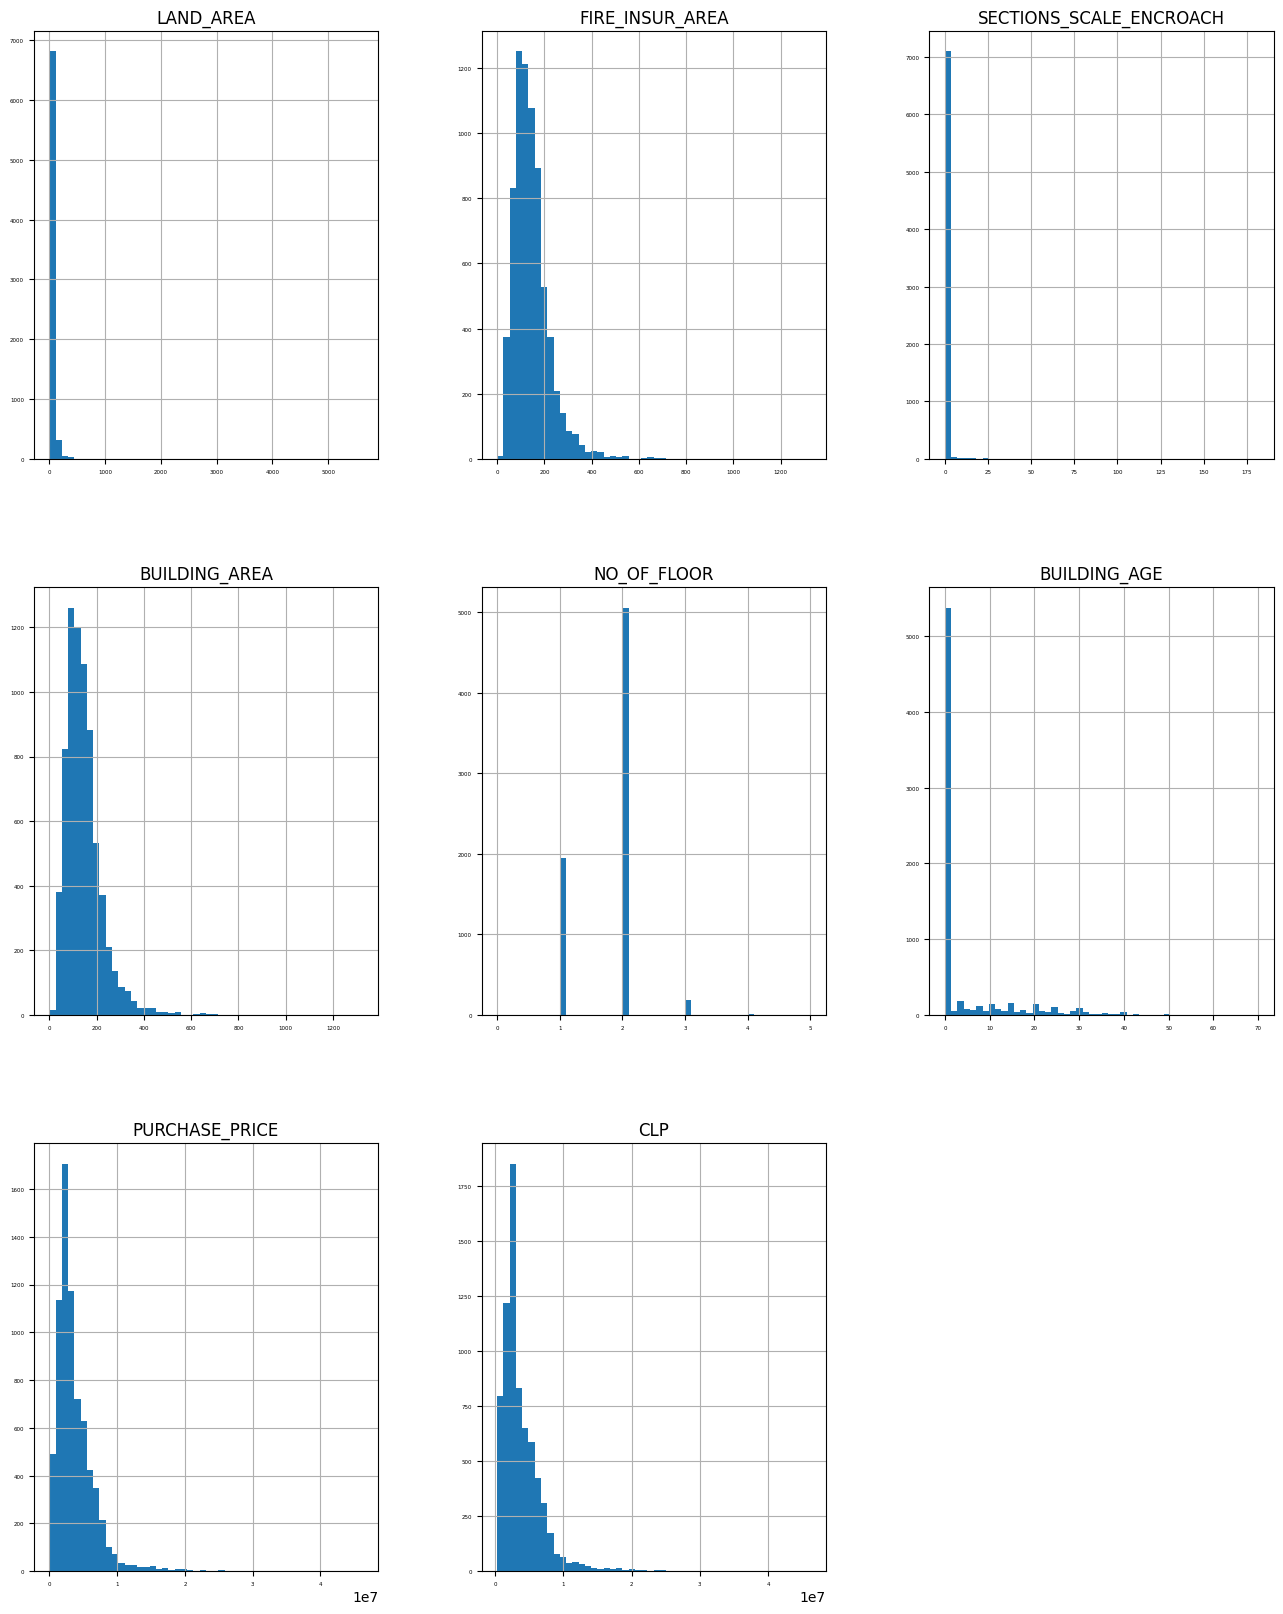

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=4, ylabelsize=4);

In [ ]:
# Check for null values in each column
null_counts = df_new.isnull().sum()

# Sort the null_counts Series in descending order
sorted_null_counts = null_counts.sort_values(ascending=False)

# Display the column names and null counts in descending order
print("Column names and null counts in descending order:")
for column, null_count in sorted_null_counts.items():
    print(f"{column}: {null_count}")

Column names and null counts in descending order:
RESIDENTIAL_USE: 1
LAND_AREA: 0
FIRE_INSUR_AREA: 0
SECTIONS_SCALE_ENCROACH: 0
BUILDING_AREA: 0
NO_OF_FLOOR: 0
PU_DRAIN: 0
BUILDING_AGE: 0
PURCHASE_PRICE: 0
DISTICT_NAME: 0
PU_ELECTRIC: 0
PU_WATER: 0
CLP: 0


In [ ]:
df_new['RESIDENTIAL_USE'].fillna('Y', inplace=True)

In [ ]:
list(set(df_new.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [ ]:

from sklearn.preprocessing import OneHotEncoder

s = (df_new.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['PU_DRAIN', 'RESIDENTIAL_USE', 'DISTICT_NAME', 'PU_ELECTRIC', 'PU_WATER']
No. of. categorical features:  5


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming dataset_df and object_cols are defined
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_new[object_cols]))
OH_cols.index = df_new.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)

df_final = df_new.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


In [ ]:
print("Full train dataset shape is {}".format(df_final.shape))

Full train dataset shape is (7221, 83)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [ ]:
# Importing required libraries
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming df_final is your DataFrame with features and target variable CLP
# Splitting the data into features (X) and target variable (y)
X = df_final.drop('CLP', axis=1)  # Features
y = df_final['CLP']  # Target variable

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_regressor.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 3.9234890946216066


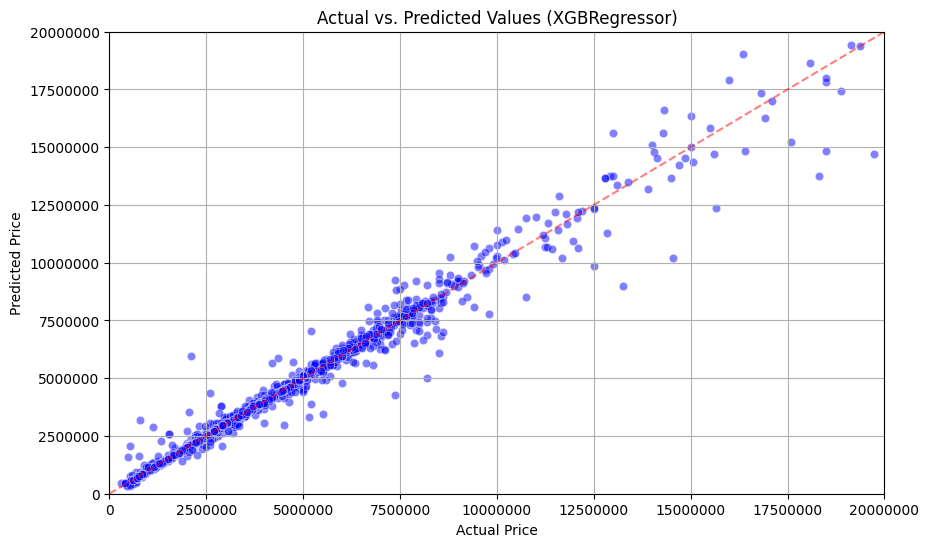

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot scatter plot of actual vs predicted values
def plot_scatter(actual, predicted, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=actual, y=predicted, color='blue', alpha=0.5)
    plt.title(f'Actual vs. Predicted Values ({model_name})')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.xlim(0, 20000000)  # Set x-axis limits from 0 to 15,000,000
    plt.ylim(0, 20000000)  # Set y-axis limits from 0 to 15,000,000
    plt.gca().ticklabel_format(style='plain')  # Set tick labels without scientific notation
    plt.plot([0, 20000000], [0, 20000000], color='red', linestyle='--', alpha=0.5)  # Add diagonal line for perfect predictions
    plt.grid(True)
    plt.show()

# Plot scatter plot for each model
models = [xgb_regressor]  # Add other models if you have trained them
model_names = ['XGBRegressor']  # Adjust model names accordingly

for model, model_name in zip(models, model_names):
    predictions = model.predict(X_test)
    plot_scatter(y_test, predictions, model_name)

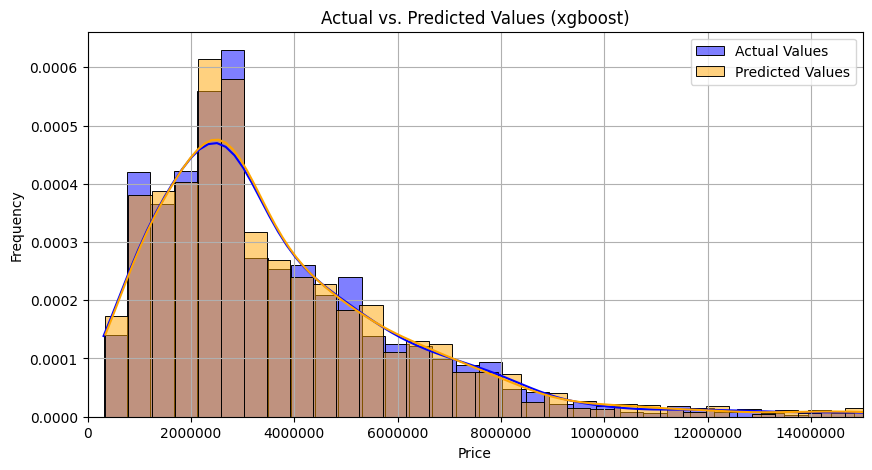

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot distributions of actual and predicted values
def plot_distributions(actual, predicted, model_name):
    plt.figure(figsize=(10, 5))
    sns.histplot(actual, color='blue', alpha=0.5, label='Actual Values', kde=True, stat='frequency')
    sns.histplot(predicted, color='orange', alpha=0.5, label='Predicted Values', kde=True, stat='frequency')
    plt.title(f'Actual vs. Predicted Values ({model_name})')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.xlim(0, 15000000)  # Set x-axis limits from 0 to 15,000,000
    plt.gca().ticklabel_format(style='plain')  # Set tick labels without scientific notation
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot distributions for each model
models = [xgb_regressor]  # Add other models if you have trained them
model_names = ['xgboost']  # Adjust model names accordingly

for model, model_name in zip(models, model_names):
    predictions = model.predict(X_test)
    plot_distributions(y_test, predictions, model_name)




In [ ]:
import matplotlib as mpl

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size= 15)

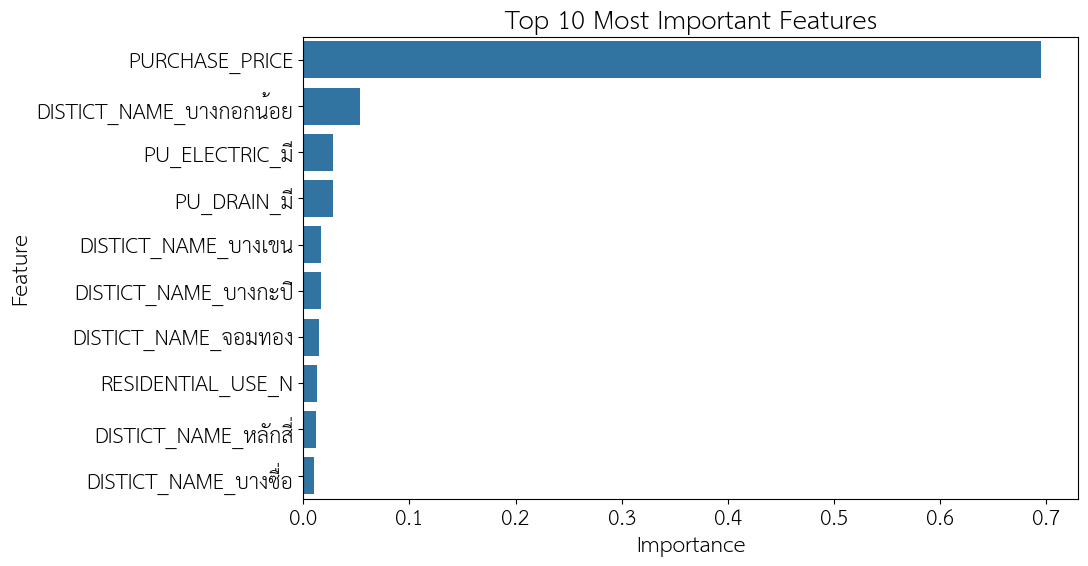

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'xgb' is your XGBoost model
feature_importances = xgb_regressor.feature_importances_

# Get the names of the features
feature_names = X_test.columns  # Assuming X_test is a pandas DataFrame

# Create a DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Plotting top 10 features
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()


In [ ]:
# Importing required libraries
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming df_final is your DataFrame with features and target variable CLP
# Splitting the data into features (X) and target variable (y)
X = df_final.drop('CLP', axis=1)  # Features
y = df_final['CLP']  # Target variable

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the KNN Regressor
knn_regressor = KNeighborsRegressor()

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_regressor.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 2.6483245567620695


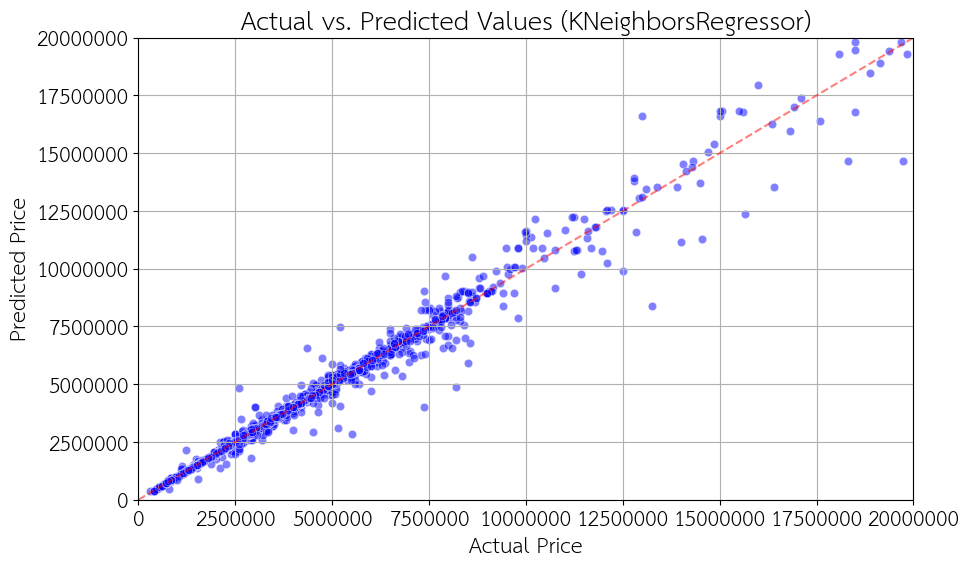

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot scatter plot of actual vs predicted values
def plot_scatter(actual, predicted, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=actual, y=predicted, color='blue', alpha=0.5)
    plt.title(f'Actual vs. Predicted Values ({model_name})')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.xlim(0, 20000000)  # Set x-axis limits from 0 to 15,000,000
    plt.ylim(0, 20000000)  # Set y-axis limits from 0 to 15,000,000
    plt.gca().ticklabel_format(style='plain')  # Set tick labels without scientific notation
    plt.plot([0, 20000000], [0, 20000000], color='red', linestyle='--', alpha=0.5)  # Add diagonal line for perfect predictions
    plt.grid(True)
    plt.show()

# Plot scatter plot for each model
models = [knn_regressor]  # Add other models if you have trained them
model_names = ['KNeighborsRegressor']  # Adjust model names accordingly

for model, model_name in zip(models, model_names):
    predictions = model.predict(X_test)
    plot_scatter(y_test, predictions, model_name)

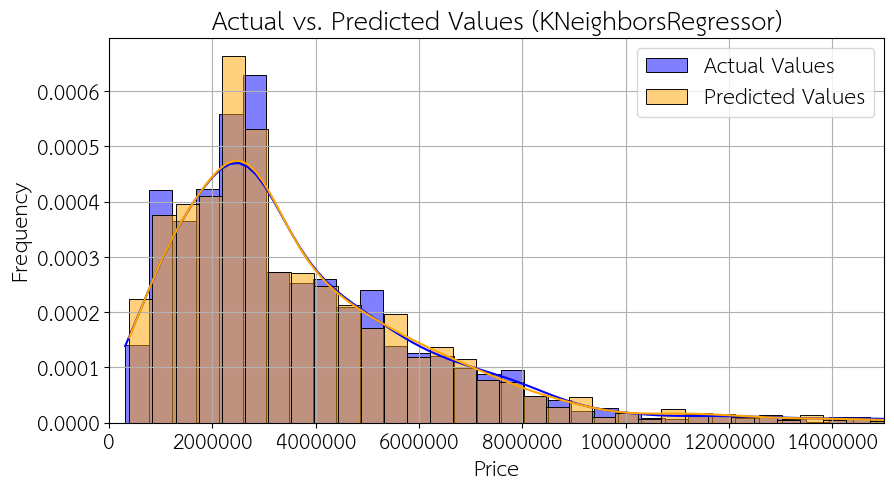

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot distributions of actual and predicted values
def plot_distributions(actual, predicted, model_name):
    plt.figure(figsize=(10, 5))
    sns.histplot(actual, color='blue', alpha=0.5, label='Actual Values', kde=True, stat='frequency')
    sns.histplot(predicted, color='orange', alpha=0.5, label='Predicted Values', kde=True, stat='frequency')
    plt.title(f'Actual vs. Predicted Values ({model_name})')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.xlim(0, 15000000)  # Set x-axis limits from 0 to 15,000,000
    plt.gca().ticklabel_format(style='plain')  # Set tick labels without scientific notation
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot distributions for each model
models = [knn_regressor]  # Add other models if you have trained them
model_names = ['KNeighborsRegressor']  # Adjust model names accordingly

for model, model_name in zip(models, model_names):
    predictions = model.predict(X_test)
    plot_distributions(y_test, predictions, model_name)




In [ ]:
# Importing required libraries
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Assuming df_final is your DataFrame with features and target variable CLP
# Splitting the data into features (X) and target variable (y)
X = df_final.drop('CLP', axis=1)  # Features
y = df_final['CLP']  # Target variable

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the Extra Trees Regressor
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
extra_trees.fit(X_train, y_train)

# Predict on the test data
y_pred = extra_trees.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 2.18%


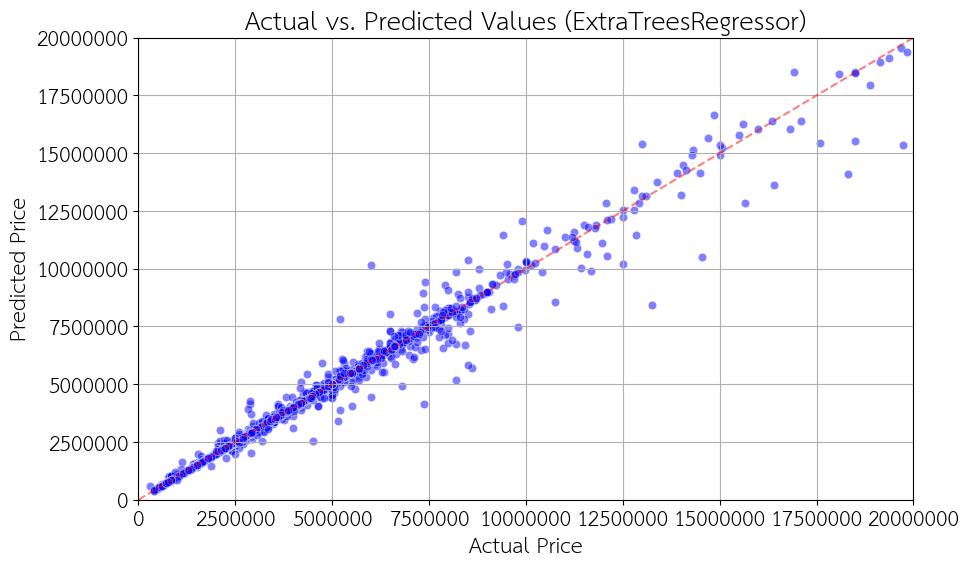

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot scatter plot of actual vs predicted values
def plot_scatter(actual, predicted, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=actual, y=predicted, color='blue', alpha=0.5)
    plt.title(f'Actual vs. Predicted Values ({model_name})')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.xlim(0, 20000000)  # Set x-axis limits from 0 to 15,000,000
    plt.ylim(0, 20000000)  # Set y-axis limits from 0 to 15,000,000
    plt.gca().ticklabel_format(style='plain')  # Set tick labels without scientific notation
    plt.plot([0, 20000000], [0, 20000000], color='red', linestyle='--', alpha=0.5)  # Add diagonal line for perfect predictions
    plt.grid(True)
    plt.show()

# Plot scatter plot for each model
models = [extra_trees]  # Add other models if you have trained them
model_names = ['ExtraTreesRegressor']  # Adjust model names accordingly

for model, model_name in zip(models, model_names):
    predictions = model.predict(X_test)
    plot_scatter(y_test, predictions, model_name)


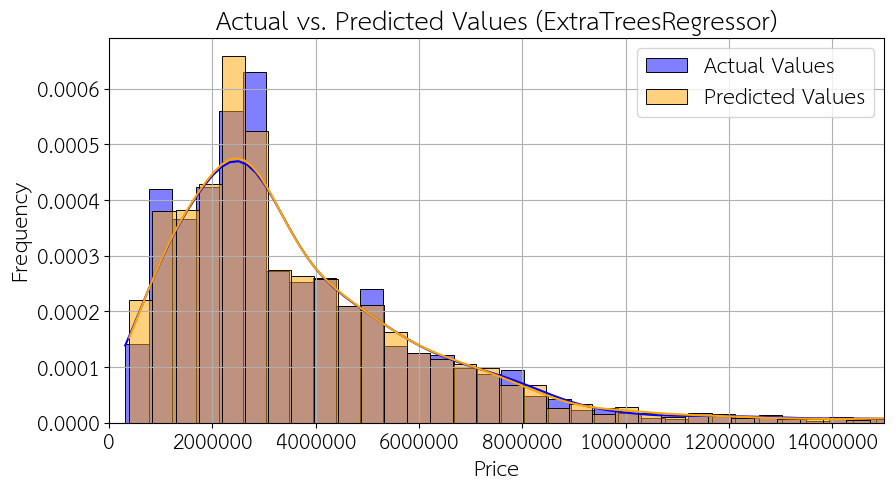

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot distributions of actual and predicted values
def plot_distributions(actual, predicted, model_name):
    plt.figure(figsize=(10, 5))
    sns.histplot(actual, color='blue', alpha=0.5, label='Actual Values', kde=True, stat='frequency')
    sns.histplot(predicted, color='orange', alpha=0.5, label='Predicted Values', kde=True, stat='frequency')
    plt.title(f'Actual vs. Predicted Values ({model_name})')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.xlim(0, 15000000)  # Set x-axis limits from 0 to 15,000,000
    plt.gca().ticklabel_format(style='plain')  # Set tick labels without scientific notation
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot distributions for each model
models = [extra_trees]  # Add other models if you have trained them
model_names = ['ExtraTreesRegressor']  # Adjust model names accordingly

for model, model_name in zip(models, model_names):
    predictions = model.predict(X_test)
    plot_distributions(y_test, predictions, model_name)




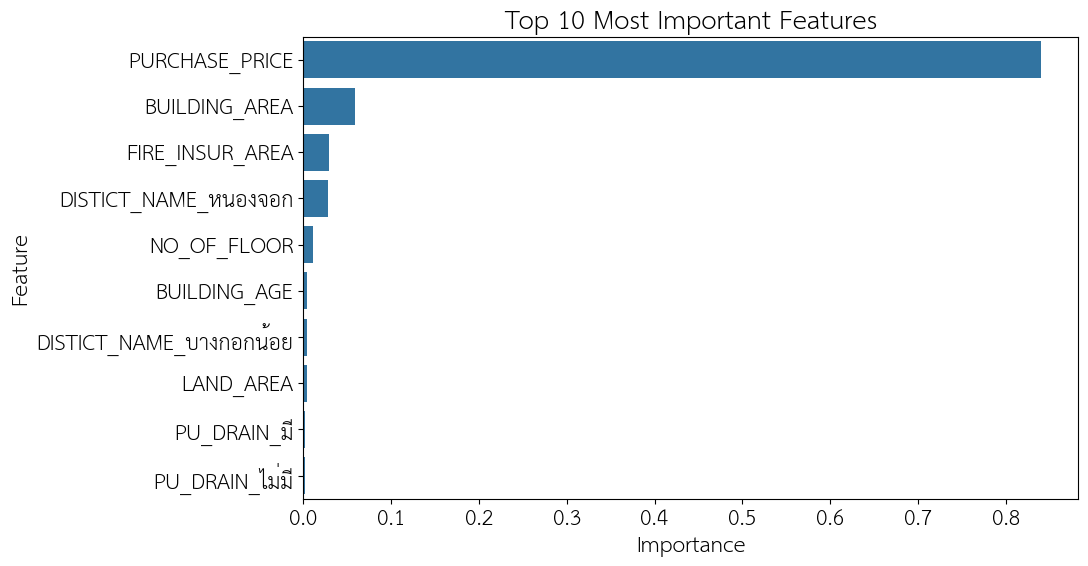

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
feature_importances = extra_trees.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Create a DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Plotting top 10 features
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()
